# TP3 -  Simulated Annealing and Parallel Temperingfor the Traveling Salesman Problem

### Author: Petter Stahle (*petter.stahle@etu.unige.ch*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import process_time
from sklearn.metrics import pairwise_distances

from tsp import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
plt.style.use(['science', 'notebook', 'grid'])

# Data

Here we define a an example instance of the data for the problem.

## Load data from task definiton file

(18, 2)
(49, 2)


(210.8515, 211.6985, -48.39, -47.949999999999996)

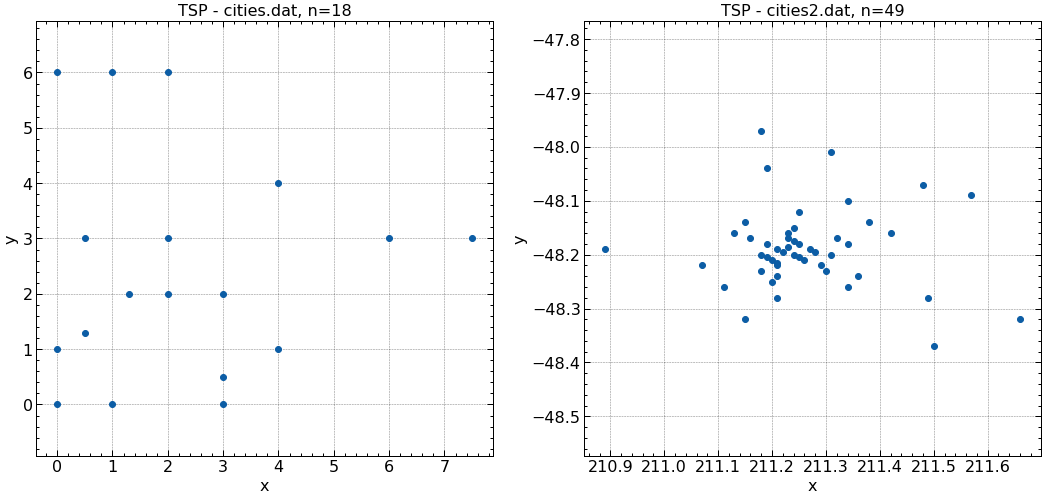

In [37]:
# Load city coordinates
plt.figure(figsize=(18,8))

plt.subplot(121)
filename = 'cities.dat'
coords_dict = read_data(filename)
cities, coords = extract_coords(coords_dict)
print(coords.shape)
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - {filename}, n={len(cities)}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(122)
filename = 'cities2.dat'
coords_dict = read_data(filename)
cities, coords = extract_coords(coords_dict)
print(coords.shape)
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - {filename}, n={len(cities)}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

## Generate TSP problem for testing

In [2]:
def generate_TSP(n=10, method='circle'):
    '''Generate the coordinates for a TSP problem with a given size n, in a unit circle or randomly (uniformly)'''
    cities = ['c'+str(i) for i in range(1, n+1)]
    if method == 'circle':
        coords = np.array([[np.cos(2*np.pi*i/n), np.sin(2*np.pi*i/n)] for i in range(n)])
    elif method == 'random':
        # sample uniformly 
        limit = 10
        coords = np.random.uniform(0, limit, size=(n, 2))
    else: raise ValueError('Wrong generation method specified')
    return cities, coords

(-0.23476993786472755,
 10.410446951402363,
 0.16409658141542294,
 9.525443499657836)

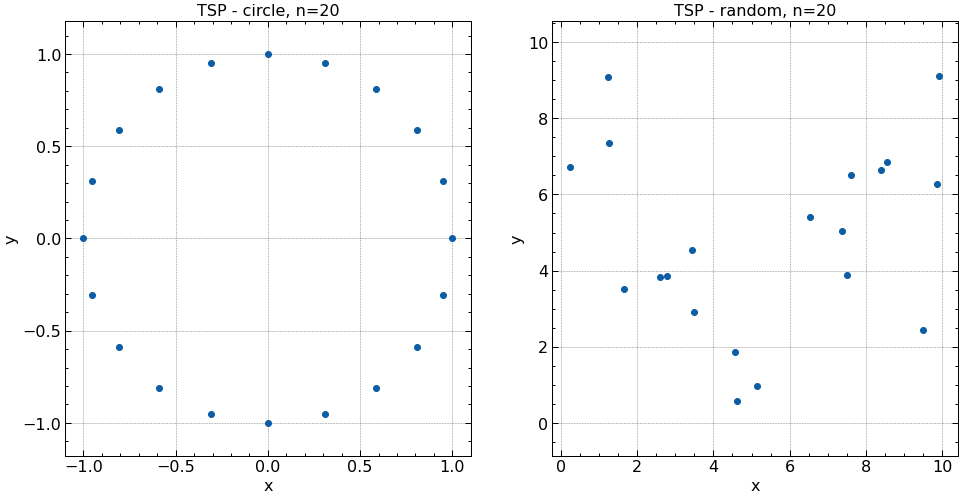

In [6]:
n=20
plt.figure(figsize=(16,8))

plt.subplot(121)
cities, coords = generate_TSP(n) # circle
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - circle, n={n}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(122)
cities, coords = generate_TSP(n, method='random') # circle
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - random, n={n}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')



# Implementation - Simulated Annealing

### Computing initial temperature

The average energy change $\hat{E}$ is computed by aggregating the energy difference $\Delta E$ between a randomly selected neighbor of $x_0$ and $x_0$ itself. We then take the absolute value of the mean.

The initial temperature is then computed from the equation:
$$e^{\frac{-\hat{E}}{T_0}} = 0.5$$
Which gives us the formula for the initial temperature:
$$T_0 = \dfrac{-\hat{E}}{\ln{0.5}} \approx 1.44 \ \hat{E}$$


## Test with cities distributed on a unit circle, n = 20

### Simulated Annealing

Initial config:  [12 19 16  8  2  1 14  3  4 10  7  9 17 18  5 15 13 11  6  0 12]
Initial temperature:  0.534470928942115
Final config:  [ 4  8  7  5  6 10  9  3  2  1  0 19 17 16 14 12 13 15 18 11  4]
Final energy:  14.34717240862598
Path:  ['c5', 'c9', 'c8', 'c6', 'c7', 'c11', 'c10', 'c4', 'c3', 'c2', 'c1', 'c20', 'c18', 'c17', 'c15', 'c13', 'c14', 'c16', 'c19', 'c12', 'c5']


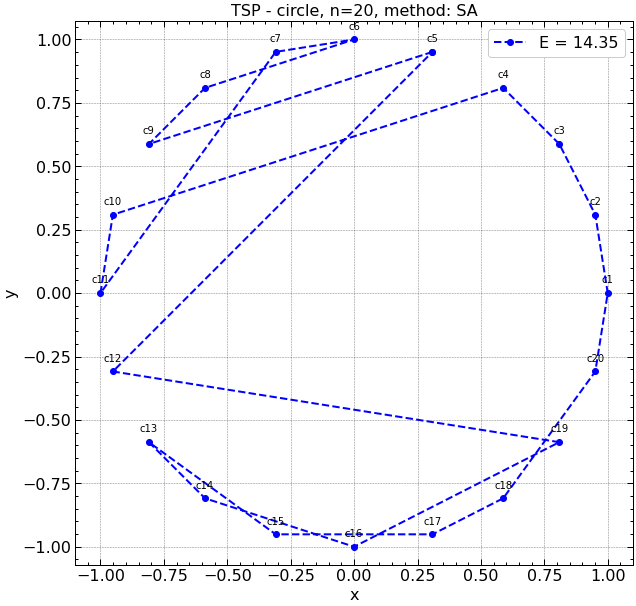

In [96]:
n = 20
cities, coords = generate_TSP(n)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

sa = SimulatedAnnealing(TSP)
print('Initial config: ', sa._current)
print('Initial temperature: ', sa._T)

config, energy = sa.search()

print('Final config: ', config)
print('Final energy: ', energy)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'E = {energy:.2f}')
plt.title(f'TSP - circle, n={n}, method: SA')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/circle_SA.png')

### Gready search

Final config:  ['c6', 'c3', 'c20', 'c12', 'c11', 'c14', 'c15', 'c13', 'c8', 'c9', 'c10', 'c4', 'c19', 'c16', 'c17', 'c2', 'c1', 'c18', 'c7', 'c5', 'c6']
Final energy:  6.257378601609232
Path:  ['c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6']


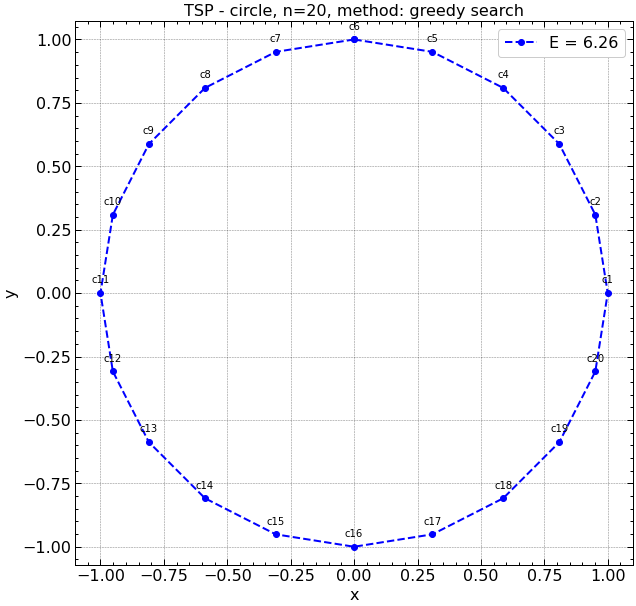

In [51]:
n = 20
cities, coords = generate_TSP(n)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

gs = GreedySearch(TSP)
config, energy = gs.search()

print('Final config: ', path)
print('Final energy: ', energy)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'E = {energy:.2f}')
plt.title(f'TSP - circle, n={n}, method: greedy search')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/circle_greedy.png')

## Comparison between greedy search and simulated annealing algorithms

### cities

In [105]:
filename = 'cities.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

SA_energy = []
SA_sols = []
GS_energy = []
GS_sols = []
for i in tqdm(range(10)):
    config, energy = SimulatedAnnealing(TSP).search()
    SA_energy.append(energy)
    SA_sols.append(config)
    config, energy = GreedySearch(TSP).search()
    GS_energy.append(energy)
    GS_sols.append(config)

  0%|          | 0/10 [00:00<?, ?it/s]

In [107]:
print('SA')
print('Mean: ', np.mean(SA_energy))
print('Std: ', np.std(SA_energy))
print('Best: ', np.min(SA_energy))
print('GS')
print('Mean: ', np.mean(GS_energy))
print('Std: ', np.std(GS_energy))
print('Min: ', np.min(GS_energy))

SA
Mean:  39.46507623357295
Std:  8.908174067286675
Best:  28.86643083410576
GS
Mean:  33.351246741579466
Std:  0.817444304295058
Min:  32.132326025652034


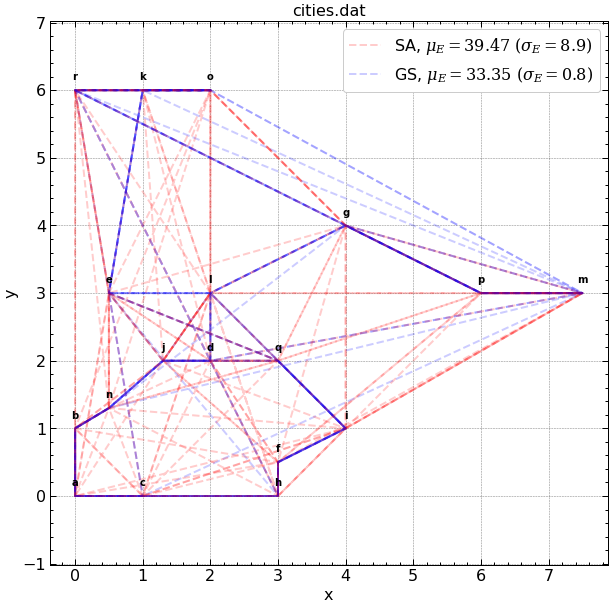

In [108]:
plt.figure(figsize=(10,10))

for i in range(10):
    c = np.array([coords[c] for c in SA_sols[i]])
    plt.plot(c[:,0], c[:,1], '--', color='red', alpha=0.2, label=rf'SA, $\mu_E = {np.mean(SA_energy):.2f}\ (\sigma_E = {np.std(SA_energy):.1f})$' if i==0 else None)
    c = np.array([coords[c] for c in GS_sols[i]])
    plt.plot(c[:,0], c[:,1], '--', color='blue', alpha=0.2, label=rf'GS, $\mu_E = {np.mean(GS_energy):.2f}\ (\sigma_E = {np.std(GS_energy):.1f})$' if i==0 else None)

plt.title(f'{filename}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/compare_cities.png')

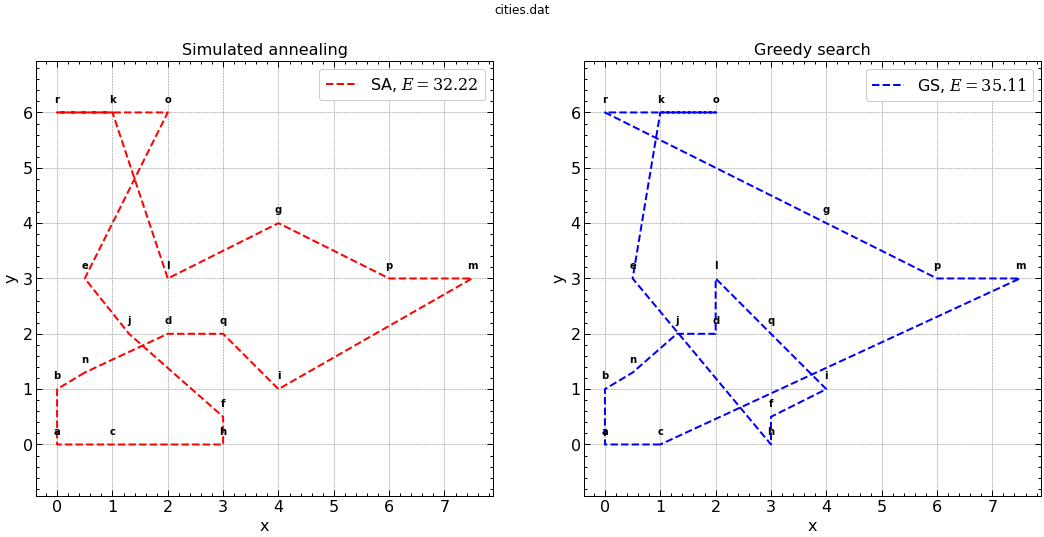

In [109]:
# One solution
fig, ax = plt.subplots(1,2,figsize=(18,8))

c = np.array([coords[c] for c in SA_sols[0]])

ax[0].plot(c[:,0], c[:,1], '--', color='red', alpha=1, label=rf'SA, $E = {SA_energy[0]:.2f}$')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('Simulated annealing')
# Annotate cities
for i in range(len(cities)):
    ax[0].annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )


c = np.array([coords[c] for c in GS_sols[0]])
ax[1].plot(c[:,0], c[:,1], '--', color='blue', alpha=1, label=rf'GS, $E = {GS_energy[0]:.2f}$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('Greedy search')

plt.suptitle(f'{filename}')

# Annotate cities
for i in range(len(cities)):
    ax[1].annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/cities.png')

### cities2

In [110]:
filename = 'cities2.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

SA_energy = []
SA_sols = []
GS_energy = []
GS_sols = []
for i in tqdm(range(10)):
    config, energy = SimulatedAnnealing(TSP).search()
    SA_energy.append(energy)
    SA_sols.append(config)
    config, energy = GreedySearch(TSP).search()
    GS_energy.append(energy)
    GS_sols.append(config)

  0%|          | 0/10 [00:00<?, ?it/s]

In [112]:
print('SA')
print('Mean: ', np.mean(SA_energy))
print('Std: ', np.std(SA_energy))
print('Best: ', np.min(SA_energy))
print('GS')
print('Mean: ', np.mean(GS_energy))
print('Std: ', np.std(GS_energy))
print('Min: ', np.min(GS_energy))

SA
Mean:  4.265116556330004
Std:  1.1372909889175489
Best:  3.252406346976778
GS
Mean:  3.2978532960092997
Std:  0.20912660154545537
Min:  2.9028858288100876


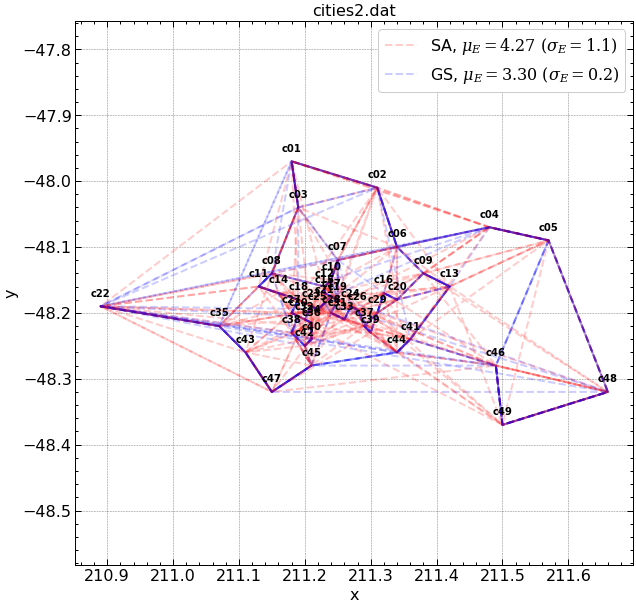

In [113]:
plt.figure(figsize=(10,10))

for i in range(10):
    c = np.array([coords[c] for c in SA_sols[i]])
    plt.plot(c[:,0], c[:,1], '--', color='red', alpha=0.2, label=rf'SA, $\mu_E = {np.mean(SA_energy):.2f}\ (\sigma_E = {np.std(SA_energy):.1f})$' if i==0 else None)
    c = np.array([coords[c] for c in GS_sols[i]])
    plt.plot(c[:,0], c[:,1], '--', color='blue', alpha=0.2, label=rf'GS, $\mu_E = {np.mean(GS_energy):.2f}\ (\sigma_E = {np.std(GS_energy):.1f})$' if i==0 else None)

plt.title(f'{filename}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/compare_cities2.png')

In [114]:
# One solution
fig, ax = plt.subplots(1,2,figsize=(18,8))

c = np.array([coords[c] for c in SA_sols[0]])

ax[0].plot(c[:,0], c[:,1], '--', color='red', alpha=1, label=rf'SA, $E = {SA_energy[0]:.2f}$')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('Simulated annealing')
# Annotate cities
for i in range(len(cities)):
    ax[0].annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )


c = np.array([coords[c] for c in GS_sols[0]])
ax[1].plot(c[:,0], c[:,1], '--', color='blue', alpha=1, label=rf'GS, $E = {GS_energy[0]:.2f}$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('Greedy search')

plt.suptitle(f'{filename}')

# Annotate cities
for i in range(len(cities)):
    ax[1].annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  
        fontfamily='sans-serif',
        fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

plt.savefig('figures/cities2.png')

## Test with uniformly distributed cities for $n = 50, 60, 80, 100$

Here we generate the TSP problem on a grid of size 10x10, with n samples uniformly distributed.

In [115]:
N = [50, 60, 80, 100]

SA_times = [[] for _ in N]
SA_energy = [[] for _ in N]
GS_energy = [[] for _ in N]
GS_times = [[] for _ in N]

for i, n in tqdm(enumerate(N)):
    for _ in tqdm(range(5)):
        cities, coords = generate_TSP(n, method='random')
        TSP = {
            'cities': cities,
            'coords': coords,
            'round_path': True
        }

        start = process_time()
        _, energy = SimulatedAnnealing(TSP).search()
        SA_times[i].append(process_time()-start)
        SA_energy[i].append(energy)
        _, energy = GreedySearch(TSP).search()
        start = process_time()
        GS_energy[i].append(energy)
        GS_times[i].append(process_time()-start)

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [116]:
print('SA')
print('Energy')
print('Mean: ', np.mean(SA_energy))
print('Std: ', np.std(SA_energy))
print('Best: ', np.min(SA_energy))
print('Time')
print('Mean: ', np.mean(SA_times), ' s')
print('Std: ', np.std(SA_times))

print('GS')
print('Energy')
print('Mean: ', np.mean(GS_energy))
print('Std: ', np.std(GS_energy))
print('Min: ', np.min(GS_energy))
print('Time')
print('Mean: ', np.mean(GS_times), ' s')
print('Std: ', np.std(GS_times))

SA
Energy
Mean:  187.17525839922962
Std:  84.36569644688123
Best:  93.9965916251057
Time
Mean:  19.329590392150017  s
Std:  14.69421524714867
GS
Energy
Mean:  83.46618022454868
Std:  11.441644032969439
Min:  61.13116574313698
Time
Mean:  1.2144050026563491e-05  s
Std:  3.6724642142315864e-06


In [118]:
mean_SA_E = [np.mean(e) for e in SA_energy]
mean_SA_t = [np.mean(t) for t in SA_times]
mean_GS_E = [np.mean(e) for e in GS_energy]
mean_GS_t = [np.mean(t) for t in GS_times]

plt.figure(None, (10,5))
plt.plot(N, mean_SA_E, color='blue', label=r'SA - $\mu_E$')
plt.plot(N, mean_GS_E, color='green', label=r'GS - $\mu_E$')
plt.plot(N, mean_SA_t, '--', color='blue', label=r'SA - $\mu_t$ [s]')
plt.plot(N, mean_GS_t, '--', color='green', label=r'GS - $\mu_t$ [s]')

plt.xlabel(r'$N$')
plt.legend()

## Impact of temperature

In [131]:
T = [0.5, 0.8, 0.9, 0.99]
SA_energy = []

filename = 'cities2.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)
TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

for i, t in tqdm(enumerate(T)):
    _, _, hist = SimulatedAnnealing(TSP, delta_T=t).search(store_history=True)
    SA_energy.append(hist)

0it [00:00, ?it/s]

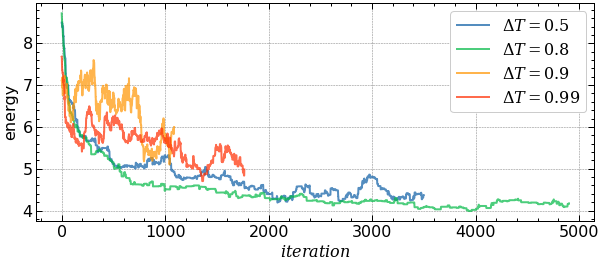

In [132]:
plt.figure(figsize=(10,4))
for i, t in enumerate(T):
    plt.plot(range(len(SA_energy[i])), SA_energy[i], alpha=0.7, label=rf'$\Delta T={t}$')

plt.xlabel(r'$iteration$')
plt.ylabel('energy')
plt.legend()

plt.savefig('figures/T.png')